Enter the path here:C:\Users\akrit\OneDrive\Desktop\2\Images\Original_image.jpg


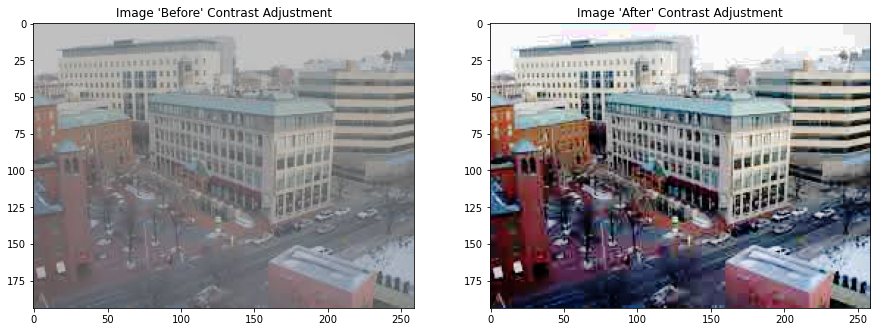

In [3]:

from IPython.display import display, Math, Latex
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_path = input("Enter the path here:")  #example -> C:\Users\xyz\OneDrive\Desktop\project\image.jpg 


img = cv2.imread(img_path)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



# convert our image into a numpy array
img = np.asarray(img)
#print(img.shape)
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram


# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist = get_histogram(flat, 256)

# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)


# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')



# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]


# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# display the real image
fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title("Image 'Before' Contrast Adjustment")

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new)
plt.title("Image 'After' Contrast Adjustment")

plt.show()